1. 데이터 전처리(데이터 가공)
2. 모델 생성
3. 예측
4. 응용 소프트웨어 개발

In [ ]:
food_a = [20,21,23,22,26,28,35,35,41,42,43,45,44,45,46,47,47,46,47,58,58,59,60,56,57,57,80]
food_b = [5,6,11,13,15,16,20,20,21,23,22,27,27,30,30,32,36,37,40,40,43,44,45,51,54,70,600]
food_c = [5,5,5,12,10,11,20,20,20,20,20,21,20,30,32,31,31,31,36,40,40,51,61,51,61,61,70]

In [ ]:
import numpy as np

food_a_mean = np.mean(food_a)
food_a_mean

44.0

In [ ]:
food_b_mean = np.mean(food_b)
food_b_mean

51.03703703703704

In [ ]:
food_c_mean = np.mean(food_c)
food_c_mean

30.185185185185187

In [ ]:
food_a_median = np.median(food_a)
food_a_median

45.0

#pandas

> Series : 1차원 데이터 처리

> DataFrame : 2차원 데이터 처리

In [ ]:
import pandas as pd

foodSeries = pd.Series(food_a)
foodSeries

0     20
1     21
2     23
3     22
4     26
5     28
6     35
7     35
8     41
9     42
10    43
11    45
12    44
13    45
14    46
15    47
16    47
17    46
18    47
19    58
20    58
21    59
22    60
23    56
24    57
25    57
26    80
dtype: int64

In [ ]:
foodSeries.describe()

count    27.000000
mean     44.000000
std      14.509944
min      20.000000
25%      35.000000
50%      45.000000
75%      56.500000
max      80.000000
dtype: float64

In [ ]:
foodSeries = pd.Series(food_b)
foodSeries.describe()

count     27.000000
mean      51.037037
std      110.789295
min        5.000000
25%       20.000000
50%       30.000000
75%       41.500000
max      600.000000
dtype: float64

In [ ]:
food_df = pd.DataFrame()
foodSeries = pd.Series(food_a)
food_df['foodA'] = foodSeries.describe()

foodSeries = pd.Series(food_b)
food_df['foodB'] = foodSeries.describe()

food_df

,foodA,foodB
count,27.000000,27.000000
mean,44.000000,51.037037
std,14.509944,110.789295
min,20.000000,5.000000
25%,35.000000,20.000000
50%,45.000000,30.000000
75%,56.500000,41.500000
max,80.000000,600.000000


In [ ]:
import pandas as pd

def getDescribe(foodCenter):
  foodSeries = pd.Series(foodCenter)
  return foodSeries.describe()

food_df =pd.DataFrame()

food_df['foodA'] = getDescribe(food_a)
food_df['foodB'] = getDescribe(food_b)
food_df['foodC'] = getDescribe(food_c)
food_df

,foodA,foodB,foodC
count,27.000000,27.000000,27.000000
mean,44.000000,51.037037,30.185185
std,14.509944,110.789295,18.859882
min,20.000000,5.000000,5.000000
25%,35.000000,20.000000,20.000000
50%,45.000000,30.000000,30.000000
75%,56.500000,41.500000,40.000000
max,80.000000,600.000000,70.000000


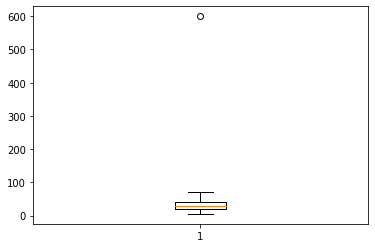

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(food_a)
plt.show()

In [ ]:
foodB_Series = pd.Series(food_b)
foodB_Series

0       5
1       6
2      11
3      13
4      15
5      16
6      20
7      20
8      21
9      23
10     22
11     27
12     27
13     30
14     30
15     32
16     36
17     37
18     40
19     40
20     43
21     44
22     45
23     51
24     54
25     70
26    600
dtype: int64

In [ ]:
#foodB_Series가 가지고 있는 값들 중에 foodB_Series<100인 참인 값만 foodB_Series<100에 저장
foodB_Series = foodB_Series[foodB_Series<100]

foodB_Series

0      5
1      6
2     11
3     13
4     15
5     16
6     20
7     20
8     21
9     23
10    22
11    27
12    27
13    30
14    30
15    32
16    36
17    37
18    40
19    40
20    43
21    44
22    45
23    51
24    54
25    70
dtype: int64

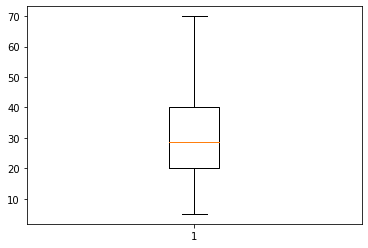

In [ ]:
plt.boxplot(foodB_Series)
plt.show()

In [ ]:
foodB_Series = pd.Series(food_b)
foodB_Series.describe()
# foodB_Series.describe().loc['mean']
# food_Series.describe().loc['25%']

count     27.000000
mean      51.037037
std      110.789295
min        5.000000
25%       20.000000
50%       30.000000
75%       41.500000
max      600.000000
dtype: float64

In [ ]:
# 데이터가 부족한 경우 이상치를 제거하게 되면 정상적인 분석이 이루어질 수 없다.
# 따라서 평균으로 이상치를 치환하여 사용한다.
foodB_Series[foodB_Series>40] = foodB_Series.describe().loc['mean']
foodB_Series

0      5.000000
1      6.000000
2     11.000000
3     13.000000
4     15.000000
5     16.000000
6     20.000000
7     20.000000
8     21.000000
9     23.000000
10    22.000000
11    27.000000
12    27.000000
13    30.000000
14    30.000000
15    32.000000
16    36.000000
17    37.000000
18    40.000000
19    40.000000
20    51.037037
21    51.037037
22    51.037037
23    51.037037
24    51.037037
25    51.037037
26    51.037037
dtype: float64

In [ ]:
#이상치가 발생된 값은 중간값으로 치환
foodB_Series[foodB_Series>40] = foodB_Series.describe().loc['50%']
foodB_Series

0      5.0
1      6.0
2     11.0
3     13.0
4     15.0
5     16.0
6     20.0
7     20.0
8     21.0
9     23.0
10    22.0
11    27.0
12    27.0
13    30.0
14    30.0
15    32.0
16    36.0
17    37.0
18    40.0
19    40.0
20    30.0
21    30.0
22    30.0
23    30.0
24    30.0
25    30.0
26    30.0
dtype: float64

In [ ]:
foodB_Series = pd.Series(food_b)
foodB_desc = foodB_Series.describe()

In [ ]:
q1 = foodB_desc.loc['25%']
q3 = foodB_desc.loc['75%']
iqr = q3 - q1
iqr

21.5

In [ ]:
lowerfence = q1 - iqr*1.5
lowerfence

-12.25

In [ ]:
upperfence = q1 + iqr*3
upperfence

84.5

In [ ]:
food_b

[5,
 6,
 11,
 13,
 15,
 16,
 20,
 20,
 21,
 23,
 22,
 27,
 27,
 30,
 30,
 32,
 36,
 37,
 40,
 40,
 43,
 44,
 45,
 51,
 54,
 70,
 600]

In [ ]:
medium = foodB_desc.loc['50%']
medium

30.0

In [ ]:
#foodB_Series[foodB_Series>upperfence] = medium
#foodB_Series[foodB_Series<lowerfence] = medium

foodB_Series[(foodB_Series>upperfence) | (foodB_Series<lowerfence)] = medium
foodB_Series

0      5
1      6
2     11
3     13
4     15
5     16
6     20
7     20
8     21
9     23
10    22
11    27
12    27
13    30
14    30
15    32
16    36
17    37
18    40
19    40
20    43
21    44
22    45
23    51
24    54
25    70
26    30
dtype: int64

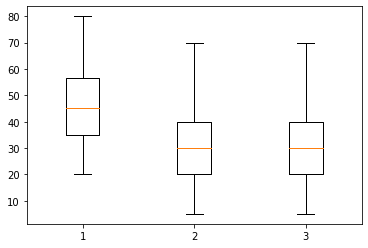

In [ ]:
food=[food_a, foodB_Series, food_c]

plt.boxplot(food)
plt.show()

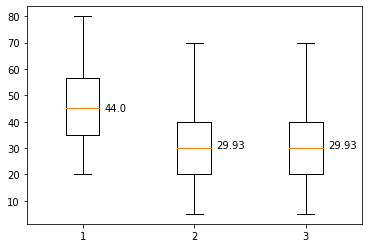

In [ ]:
# round(데이터, 소수점 자리수) 반올림
food_a_mean = round(np.mean(food_a), 2)
food_b_mean = round(np.mean(foodB_Series), 2)
food_c_mean = round(np.mean(food_c), 2)

plt.boxplot(food)
# text(x좌표, y좌표, 데이터)
plt.text(1.2, food_a_mean, food_a_mean)
plt.text(2.2, food_b_mean, food_b_mean)
plt.text(3.2, food_b_mean, food_b_mean)
plt.show()

#데이터 클린징

In [ ]:
#google 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/인공지능/data/bicycle.csv'
#read_csv 파일 열기
bicycle_df = pd.read_csv(path, engine='python', encoding='cp949')
bicycle_df.head(3)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN


In [ ]:
bicycle_df.isnull()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,True,False,True
417,False,False,False,False,False,False,False,False,False,False,False
418,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
bicycle_df.notnull()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
415,True,True,True,True,True,True,True,True,True,True,True
416,True,True,True,True,True,True,True,True,False,True,False
417,True,True,True,True,True,True,True,True,True,True,True
418,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
bicycle_df.dropna(axis=0)

In [ ]:
bicycle_df.dropna(axis=1)

In [ ]:
bicycle_df.dropna()

In [ ]:
bicycle_df.head()

In [ ]:
bicycle_df['이용거리']
bicycle_df['이용거리'].dropna()

<bound method Series.dropna of 0      1100.0
1      1420.0
2         NaN
3      1380.0
4      1650.0
        ...  
415    2200.0
416       NaN
417    2280.0
418    1180.0
419    8100.0
Name: 이용거리, Length: 420, dtype: float64>

In [ ]:
bicycle_df[['대여소번호', '대여거치대', '이용거리']]
bicycle_df[['대여소번호', '대여거치대', '이용거리']].dropna(axis=0)

,대여소번호,대여거치대,이용거리
0,646,3.0,1100.0
1,646,2.0,1420.0
3,646,1.0,1380.0
4,512,11.0,1650.0
5,646,1.0,1350.0
...,...,...,...
414,112,1.0,1620.0
415,112,5.0,2200.0
417,113,24.0,2280.0
418,152,18.0,1180.0


In [ ]:
#bicycle_df.fillna(0)
#bicycle_df.이용거리.fillna(0)
bicycle_df['이용거리'].fillna(0)
bicycle_df.fillna('missing')

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,missing
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,missing,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,missing,5.0,missing
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


In [ ]:
df2 = bicycle_df
#df2.mean()
#df2.mean()['이용거리']
#df2['이용거리'].fillna(df2.mean()['이용거리'])

#이용거리의 결측치를 평균 이용거리로 치환
df2.fillna(df2.mean()['이용거리'])['이용거리']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


#Quiz

> 현재 발생되는 결측치를 평균값으로 치환하시오.